# Support file processing
File to do all pre-processing needed that shouldn't be uploaded

## Generating all land use maps...

Loading inventory of SOC Foreground files

In [3]:
# modules
import polars as pl
import numpy as np
import sbtn_leaf.map_calculations as mc
import sbtn_leaf.map_plotting as mp

# files
files_inventory = pl.read_csv("../data/SOC_Foreground_files/foreground_occupation_file_index.csv")

In [4]:
files_inventory.head()

file_name,land_use,path
str,str,str
"""Occ_foreground_Broadleaf_Decid…","""Broadleaf_Deciduous_Boreal_dry""","""../data/soc_Raster_Foreground_…"
"""Occ_foreground_Broadleaf_Decid…","""Broadleaf_Deciduous_Boreal_moi…","""../data/soc_Raster_Foreground_…"
"""Occ_foreground_Broadleaf_Decid…","""Broadleaf_Deciduous_Cold_tempe…","""../data/soc_Raster_Foreground_…"
"""Occ_foreground_Broadleaf_Decid…","""Broadleaf_Deciduous_Cold_tempe…","""../data/soc_Raster_Foreground_…"
"""Occ_foreground_Broadleaf_Decid…","""Broadleaf_Deciduous_Subtropica…","""../data/soc_Raster_Foreground_…"


Now creating the loop

In [18]:
mp.inspect_raster("../data/SOC_Foreground_files/Occ_foreground_Broadleaf_Deciduous_Boreal_dry.tif")

File: ../data/SOC_Foreground_files/Occ_foreground_Broadleaf_Deciduous_Boreal_dry.tif
Driver: GTiff
Width, Height: 4320, 2083
Number of Bands: 1
CRS: EPSG:4326
Bounds: BoundingBox(left=-179.99999999999997, bottom=-89.99999999999994, right=179.99999999999991, top=83.58333333333331)
Pixel Size: (0.0833333333333333, 0.0833333333333333)
No-data Value: None

--- Raster Metadata ---
TIFFTAG_SOFTWARE: MATLAB 9.8, Mapping Toolbox 4.10
AREA_OR_POINT: Area

--- Band Information ---

Band 1:
  Data Type: float64
  Min Value: 50.9646539740672
  Max Value: 27020.6993905685
  Mean Value: 508.318560865058
  Standard Deviation: 656.1209725770067


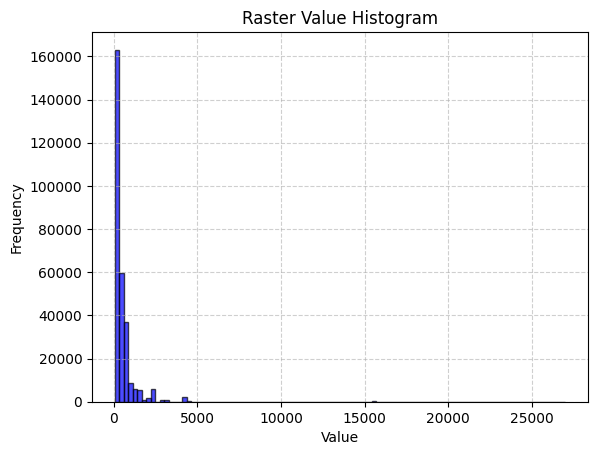

In [27]:
mp.plot_raster_histogram("../data/SOC_Foreground_files/Occ_foreground_Broadleaf_Deciduous_Boreal_dry.tif", bins=100)

In [15]:
output_folder = "../data/land_use/"

In [28]:
for row in files_inventory.iter_rows(named=True):
    input_path = row["path"]
    land_use_type = row["land_use"]
    output_path = output_folder + "lu_" + land_use_type + ".tif"

    print(f"Creating a land use raster for {land_use_type}")

    mc.binarize_raster(input_path, output_path)
    print(f"{land_use_type} rasterized succesfully!\n")

Creating a land use raster for Broadleaf_Deciduous_Boreal_dry
Broadleaf_Deciduous_Boreal_dry rasterized succesfully!

Creating a land use raster for Broadleaf_Deciduous_Boreal_moist
Broadleaf_Deciduous_Boreal_moist rasterized succesfully!

Creating a land use raster for Broadleaf_Deciduous_Cold_temperate_dry
Broadleaf_Deciduous_Cold_temperate_dry rasterized succesfully!

Creating a land use raster for Broadleaf_Deciduous_Cold_temperate_moist
Broadleaf_Deciduous_Cold_temperate_moist rasterized succesfully!

Creating a land use raster for Broadleaf_Deciduous_Subtropical
Broadleaf_Deciduous_Subtropical rasterized succesfully!

Creating a land use raster for Broadleaf_Deciduous_Tropical
Broadleaf_Deciduous_Tropical rasterized succesfully!

Creating a land use raster for Broadleaf_Deciduous_Warm_temperate_dry
Broadleaf_Deciduous_Warm_temperate_dry rasterized succesfully!

Creating a land use raster for Broadleaf_Deciduous_Warm_temperate_moist
Broadleaf_Deciduous_Warm_temperate_moist rasteri

Inpsecting...

In [29]:
test_file = "../data/land_use/lu_Irrigated_Maize_residues_left_on_the_field.tif"

In [30]:
mp.inspect_raster(test_file)

File: ../data/land_use/lu_Irrigated_Maize_residues_left_on_the_field.tif
Driver: GTiff
Width, Height: 4320, 2083
Number of Bands: 1
CRS: EPSG:4326
Bounds: BoundingBox(left=-179.99999999999997, bottom=-89.99999999999994, right=179.99999999999991, top=83.58333333333331)
Pixel Size: (0.0833333333333333, 0.0833333333333333)
No-data Value: 255.0

--- Raster Metadata ---
AREA_OR_POINT: Area

--- Band Information ---

Band 1:
  Data Type: uint8
  Min Value: 1
  Max Value: 1
  Mean Value: 1.0
  Standard Deviation: 0.0


Raster has 1 different values. Min: 1.00. Max: 1.00


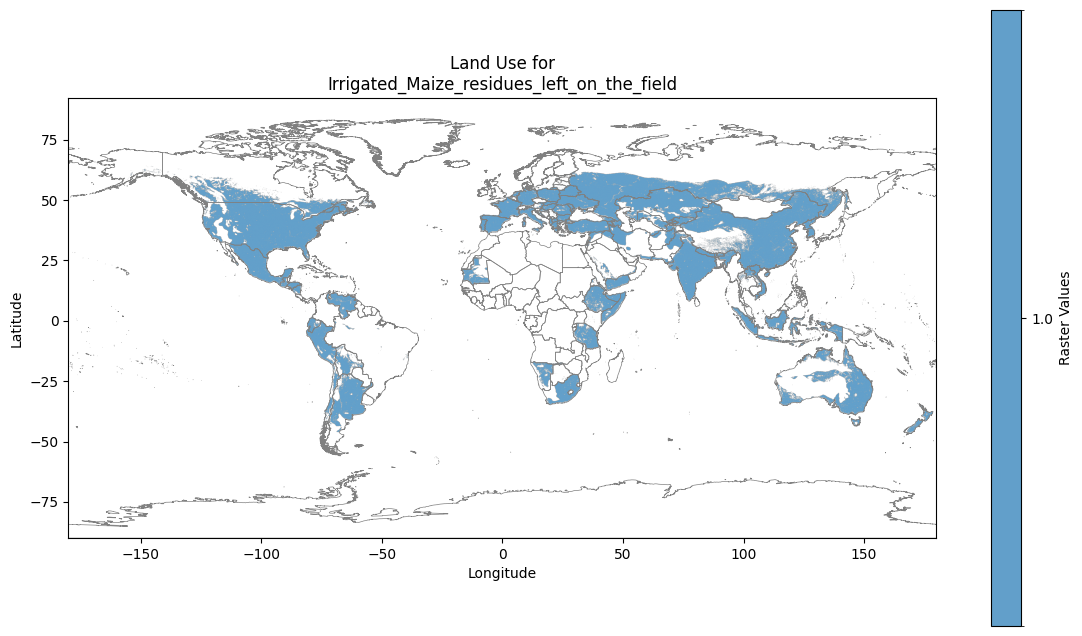

In [31]:
mp.plot_raster_on_world_extremes_cutoff(test_file, "Land Use for\nIrrigated_Maize_residues_left_on_the_field", alpha=0)